In [ ]:
# Importing essential libraries and functions

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
import tensorflow as tf

In [ ]:
from keras.preprocessing.text import one_hot, Tokenizer
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Loading dataset

In [ ]:


amazon_review = pd.read_csv("amazon1_reviews.csv")



In [ ]:
# Dataset exploration

amazon_review.shape

(53298, 8)

In [ ]:
amazon_review.head(5)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,5306d3f8-516d-4453-9903-2d6d39fb0a75,Corey Britt,Okay so they told me to create a new account I...,1,0,28.12.0.100,2024-06-16 21:48:38,28.12.0.100
1,055d0ca9-277f-4318-aa32-33ab23781666,Bertha Garcia,👍,5,0,28.12.0.100,2024-06-16 21:44:12,28.12.0.100
2,3f98a5d8-bda3-4d4e-a004-238ccfc1a3df,Valerie Richardson,Always easy to use!,5,0,28.12.0.100,2024-06-16 21:43:43,28.12.0.100
3,7ba3fa36-39cd-4f35-ab23-dc55b3ff0495,Debbie Brotherton,Very good quick delivery,5,0,NaN,2024-06-16 21:32:44,NaN
4,26d63894-e155-4f8e-bd21-4c2cfdbe06f4,Nicholas Soto,I tried buying two items. My card was locked a...,2,0,28.12.0.100,2024-06-16 21:26:36,28.12.0.100


In [ ]:
def get_sentiment(score):
  if score <= 3:
    return 'Bad'
  else:
    return 'Good'

amazon_review['sentiment'] = amazon_review['score'].apply(get_sentiment)
amazon_review.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,sentiment
0,5306d3f8-516d-4453-9903-2d6d39fb0a75,Corey Britt,Okay so they told me to create a new account I...,1,0,28.12.0.100,2024-06-16 21:48:38,28.12.0.100,Bad
1,055d0ca9-277f-4318-aa32-33ab23781666,Bertha Garcia,👍,5,0,28.12.0.100,2024-06-16 21:44:12,28.12.0.100,Good
2,3f98a5d8-bda3-4d4e-a004-238ccfc1a3df,Valerie Richardson,Always easy to use!,5,0,28.12.0.100,2024-06-16 21:43:43,28.12.0.100,Good
3,7ba3fa36-39cd-4f35-ab23-dc55b3ff0495,Debbie Brotherton,Very good quick delivery,5,0,NaN,2024-06-16 21:32:44,NaN,Good
4,26d63894-e155-4f8e-bd21-4c2cfdbe06f4,Nicholas Soto,I tried buying two items. My card was locked a...,2,0,28.12.0.100,2024-06-16 21:26:36,28.12.0.100,Bad


In [ ]:
# Checking for missing values

amazon_review.isnull().values.any()

True

In [ ]:
print("Null values in each column:\n", amazon_review.isnull().sum())

Null values in each column:
 reviewId                   0
userName                   5
content                    2
score                      0
thumbsUpCount              0
reviewCreatedVersion    5239
at                         0
appVersion              5239
sentiment                  0
dtype: int64


In [ ]:
amazon_review = amazon_review.dropna()


In [ ]:
# Checking for missing values

amazon_review.isnull().values.any()

False

In [ ]:
print(amazon_review.columns)


Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion', 'sentiment'],
      dtype='object')


In [ ]:
amazon_review = amazon_review.drop(["userName", "reviewCreatedVersion"], axis=1)

In [ ]:
amazon_review.head(20)

,reviewId,content,score,thumbsUpCount,at,appVersion,sentiment
0,5306d3f8-516d-4453-9903-2d6d39fb0a75,Okay so they told me to create a new account I...,1,0,2024-06-16 21:48:38,28.12.0.100,Bad
1,055d0ca9-277f-4318-aa32-33ab23781666,👍,5,0,2024-06-16 21:44:12,28.12.0.100,Good
2,3f98a5d8-bda3-4d4e-a004-238ccfc1a3df,Always easy to use!,5,0,2024-06-16 21:43:43,28.12.0.100,Good
4,26d63894-e155-4f8e-bd21-4c2cfdbe06f4,I tried buying two items. My card was locked a...,2,0,2024-06-16 21:26:36,28.12.0.100,Bad
5,fff47ed5-bf78-41af-82f5-a05b2a298901,"fast, reliable and if there is a return, it ca...",5,0,2024-06-16 20:57:22,28.11.2.100,Good
6,008c603a-7347-45d1-89dc-1013473b0dd2,amazing 👏,5,0,2024-06-16 20:50:32,28.12.0.100,Good
7,ae3cfbf7-c849-44c4-b523-4e8bbaee4b20,I always have a great shopping experience with...,5,0,2024-06-16 20:47:51,28.12.0.100,Good
8,27b8e0fe-06ac-41fb-a63b-46689670fc88,Most of the time it's great. The only real iss...,3,0,2024-06-16 20:35:58,28.12.0.100,Bad
9,a6c5852a-5598-4198-a858-bea6caddcdc0,Stop video auto play once and for all. Down vo...,1,0,2024-06-16 20:04:46,28.12.0.100,Bad
11,0649a83e-f8fc-4203-bb52-b9fc65c1a798,Prices aren't as good as they used to be..,3,0,2024-06-16 19:36:49,28.12.0.100,Bad


<AxesSubplot: xlabel='sentiment', ylabel='count'>

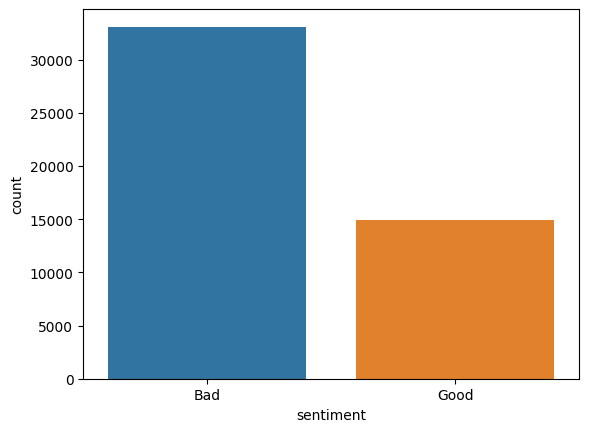

In [ ]:
# Let's observe distribution of positive / negative sentiments in dataset

import seaborn as sns
sns.countplot(x='sentiment', data=amazon_review)

## Data Preprocessing

In [ ]:
amazon_review["content"][2]

# You can see that our text contains punctuations, brackets, HTML tags and numbers
# We will preprocess this text in the next section

'Always easy to use!'

In [ ]:
# import b2_preprocessing_function
from b2_preprocessing_function import CustomPreprocess

In [ ]:
custom = CustomPreprocess()
custom.preprocess_text("Those were the best days of my life!")

'best days life'

In [ ]:
# Calling preprocessing_text function on amazon_review

X = []
sentences = list(amazon_review['content'])
for sen in sentences:
    X.append(custom.preprocess_text(sen))

In [ ]:
# Sample cleaned up movie review

X[6]

'always great shopping experience amazon'

In [ ]:
# Converting sentiment labels to 0 & 1

y = amazon_review['sentiment']

y = np.array(list(map(lambda x: 1 if x=="Good" else 0, y)))

In [ ]:
y

array([0, 1, 1, ..., 0, 0, 1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The train set will be used to train our deep learning models
# while test set will be used to evaluate how well our model performs

## Preparing embedding layer

In [ ]:
# Embedding layer expects the words to be in numeric form
# Using Tokenizer function from keras.preprocessing.text library
# Method fit_on_text trains the tokenizer
# Method texts_to_sequences converts sentences to their numeric form

word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [ ]:
import io
import json

In [ ]:
# Saving
tokenizer_json = word_tokenizer.to_json()
with io.open('b5_tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [ ]:
# Adding 1 to store dimensions for words for which no pretrained word embeddings exist

vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

24853

In [ ]:
# Padding all reviews to fixed length 100

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
# Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('a2_glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
# Create Embedding Matrix having 100 columns
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
embedding_matrix.shape

(24853, 100)

# Model Training with:

## Simple Neural Network

In [ ]:
ann_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

ann_model.add(embedding_layer)

ann_model.add(Flatten())
ann_model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Model compiling

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(ann_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          2485300   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 1)                 10001     
                                                                 
Total params: 2,495,301
Trainable params: 10,001
Non-trainable params: 2,485,300
_________________________________________________________________
None


In [ ]:
# Model training

ann_model_history = ann_model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
241/241 [==============================] - 2s 5ms/step - loss: 0.3984 - acc: 0.8414 - val_loss: 0.3280 - val_acc: 0.8735
Epoch 2/20
241/241 [==============================] - 1s 5ms/step - loss: 0.3157 - acc: 0.8797 - val_loss: 0.3119 - val_acc: 0.8805
Epoch 3/20
241/241 [==============================] - 1s 5ms/step - loss: 0.2947 - acc: 0.8875 - val_loss: 0.3047 - val_acc: 0.8813
Epoch 4/20
241/241 [==============================] - 1s 4ms/step - loss: 0.2816 - acc: 0.8910 - val_loss: 0.3051 - val_acc: 0.8789
Epoch 5/20
241/241 [==============================] - 1s 4ms/step - loss: 0.2727 - acc: 0.8942 - val_loss: 0.3056 - val_acc: 0.8787
Epoch 6/20
241/241 [==============================] - 1s 4ms/step - loss: 0.2666 - acc: 0.8978 - val_loss: 0.3083 - val_acc: 0.8738
Epoch 7/20
241/241 [==============================] - 1s 4ms/step - loss: 0.2613 - acc: 0.9006 - val_loss: 0.3153 - val_acc: 0.8689
Epoch 8/20
241/241 [==============================] - 1s 4ms/step - loss: 0.

301/301 [==============================] - 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.92      0.91      6644
    Positive       0.81      0.77      0.79      2967

    accuracy                           0.87      9611
   macro avg       0.86      0.85      0.85      9611
weighted avg       0.87      0.87      0.87      9611

F1 Score: 0.7908022130013831
Recall: 0.7708122682844624
Precision: 0.8118565850195243


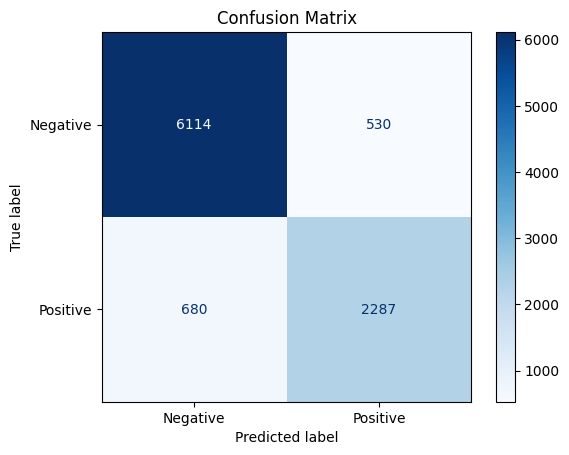

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
y_pred = ann_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score, recall_score, precision_score
print("Classification Report:")
print(classification_report(y_test, y_pred_binary, target_names=['Negative', 'Positive']))

# Calculate F1 score, recall, and precision
f1 = f1_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)

print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Predictions on the Test Set

score = ann_model.evaluate(X_test, y_test, verbose=1)

301/301 [==============================] - 1s 2ms/step - loss: 0.3456 - acc: 0.8741


In [ ]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.3455880284309387
Test Accuracy: 0.8741025924682617


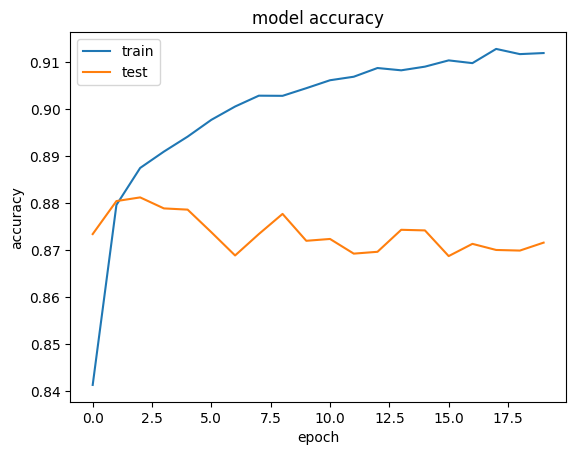

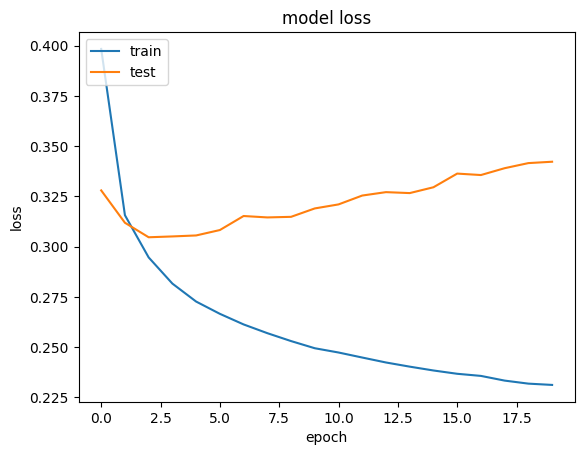

In [ ]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(ann_model_history.history['acc'])
plt.plot(ann_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(ann_model_history.history['loss'])
plt.plot(ann_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Convolutional Neural Network

In [ ]:
from keras.layers import Conv1D

In [ ]:
# Neural Network architecture

cnn_model = Sequential()

embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
cnn_model.add(embedding_layer)

cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Model compiling

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          2485300   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,549,557
Trainable params: 64,257
Non-trainable params: 2,485,300
_________________________________________________________________
None


In [ ]:
# Model training

cnn_model_history = cnn_model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
241/241 [==============================] - 7s 26ms/step - loss: 0.3482 - acc: 0.8580 - val_loss: 0.2688 - val_acc: 0.8944
Epoch 2/20
241/241 [==============================] - 6s 25ms/step - loss: 0.2558 - acc: 0.9022 - val_loss: 0.2539 - val_acc: 0.9034
Epoch 3/20
241/241 [==============================] - 6s 24ms/step - loss: 0.2226 - acc: 0.9152 - val_loss: 0.2590 - val_acc: 0.9022
Epoch 4/20
241/241 [==============================] - 6s 24ms/step - loss: 0.1922 - acc: 0.9289 - val_loss: 0.2445 - val_acc: 0.9086
Epoch 5/20
241/241 [==============================] - 6s 24ms/step - loss: 0.1604 - acc: 0.9443 - val_loss: 0.2459 - val_acc: 0.9113
Epoch 6/20
241/241 [==============================] - 6s 24ms/step - loss: 0.1337 - acc: 0.9548 - val_loss: 0.2793 - val_acc: 0.8996
Epoch 7/20
241/241 [==============================] - 6s 26ms/step - loss: 0.1062 - acc: 0.9688 - val_loss: 0.2609 - val_acc: 0.9083
Epoch 8/20
241/241 [==============================] - 6s 24ms/step - 

301/301 [==============================] - 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.93      0.92      6644
    Positive       0.84      0.82      0.83      2967

    accuracy                           0.90      9611
   macro avg       0.88      0.87      0.88      9611
weighted avg       0.89      0.90      0.89      9611

F1 Score: 0.8279276203482417
Recall: 0.8173238961914392
Precision: 0.838810100311311


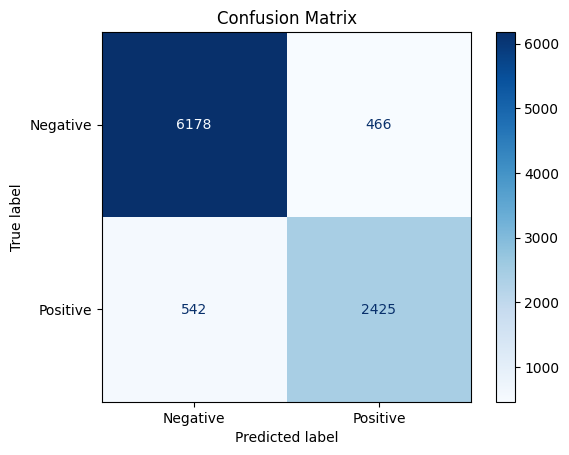

In [ ]:
y_pred = cnn_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score, recall_score, precision_score
print("Classification Report:")
print(classification_report(y_test, y_pred_binary, target_names=['Negative', 'Positive']))

# Calculate F1 score, recall, and precision
f1 = f1_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)

print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Predictions on the Test Set

score = cnn_model.evaluate(X_test, y_test, verbose=1)

301/301 [==============================] - 1s 4ms/step - loss: 0.3987 - acc: 0.8951


In [ ]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.3986630141735077
Test Accuracy: 0.8951202034950256


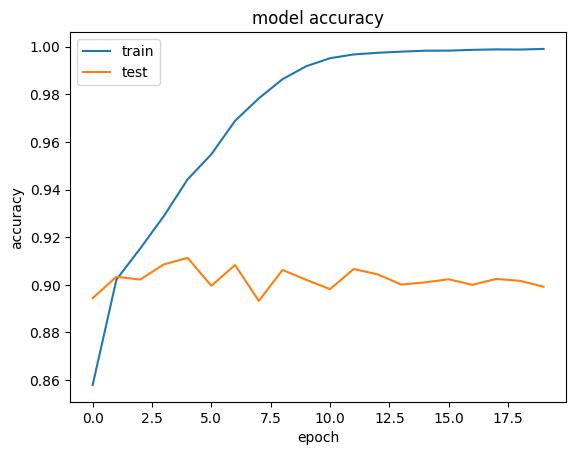

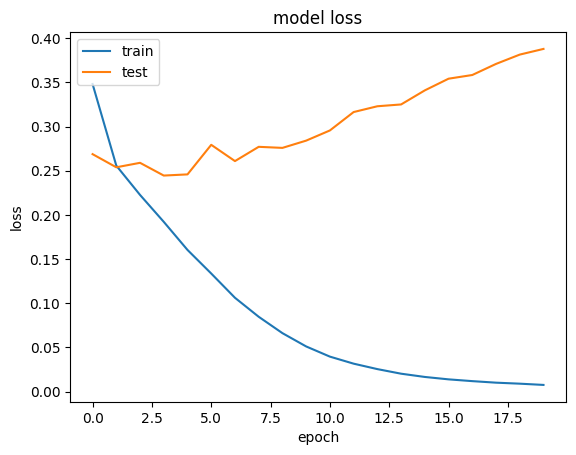

In [ ]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(cnn_model_history.history['acc'])
plt.plot(cnn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

## Recurrent Neural Network (LSTM)

In [ ]:
from keras.layers import LSTM,Bidirectional
from tensorflow.keras.optimizers import Adam

In [ ]:
lstm_model = Sequential()

# Embedding Layer (with GloVe embeddings)
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False)
lstm_model.add(embedding_layer)

# Bidirectional LSTM Layer
lstm_model.add(Bidirectional(LSTM(128, return_sequences=True)))
lstm_model.add(Dropout(0.5))

# Additional LSTM Layer
lstm_model.add(LSTM(64))
lstm_model.add(Dropout(0.5))

# Dense Layer
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dropout(0.5))

# Output Layer
lstm_model.add(Dense(1, activation='sigmoid'))




In [ ]:
# Compile the model with class weights
class_weight = {0: 1.0, 1: 2.0}  # Adjust weights according to class imbalance
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
print(lstm_model.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          2485300   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 256)         234496    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 100, 256)          0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                      

In [ ]:
# Train the model with class weights
lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=64, epochs=6, verbose=1, validation_split=0.2, class_weight=class_weight)

Epoch 1/6
481/481 [==============================] - 172s 349ms/step - loss: 0.7426 - accuracy: 0.7219 - val_loss: 0.3425 - val_accuracy: 0.8729
Epoch 2/6
481/481 [==============================] - 162s 336ms/step - loss: 0.4680 - accuracy: 0.8771 - val_loss: 0.3114 - val_accuracy: 0.8832
Epoch 3/6
481/481 [==============================] - 163s 339ms/step - loss: 0.4516 - accuracy: 0.8800 - val_loss: 0.3308 - val_accuracy: 0.8676
Epoch 4/6
481/481 [==============================] - 167s 347ms/step - loss: 0.4120 - accuracy: 0.8906 - val_loss: 0.2601 - val_accuracy: 0.9036
Epoch 5/6
481/481 [==============================] - 164s 340ms/step - loss: 0.4010 - accuracy: 0.8942 - val_loss: 0.2580 - val_accuracy: 0.9034
Epoch 6/6
481/481 [==============================] - 163s 339ms/step - loss: 0.3846 - accuracy: 0.8984 - val_loss: 0.2657 - val_accuracy: 0.8922


In [ ]:
# Train the model with class weights
lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=64, epochs=6, verbose=1, validation_split=0.2, class_weight=class_weight)

Epoch 1/6
481/481 [==============================] - 144s 298ms/step - loss: 0.3655 - accuracy: 0.9019 - val_loss: 0.2606 - val_accuracy: 0.9048
Epoch 2/6
481/481 [==============================] - 150s 311ms/step - loss: 0.3635 - accuracy: 0.9025 - val_loss: 0.2851 - val_accuracy: 0.8905
Epoch 3/6
481/481 [==============================] - 150s 312ms/step - loss: 0.3418 - accuracy: 0.9120 - val_loss: 0.2762 - val_accuracy: 0.8969
Epoch 4/6
481/481 [==============================] - 152s 317ms/step - loss: 0.3358 - accuracy: 0.9119 - val_loss: 0.2829 - val_accuracy: 0.8947
Epoch 5/6
481/481 [==============================] - 152s 316ms/step - loss: 0.3148 - accuracy: 0.9177 - val_loss: 0.2710 - val_accuracy: 0.8948
Epoch 6/6
481/481 [==============================] - 152s 317ms/step - loss: 0.2931 - accuracy: 0.9250 - val_loss: 0.2639 - val_accuracy: 0.8888


In [ ]:
# Train the model with class weights
lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=64, epochs=3, verbose=1, validation_split=0.2, class_weight=class_weight)

Epoch 1/3
481/481 [==============================] - 155s 323ms/step - loss: 0.2834 - accuracy: 0.9258 - val_loss: 0.2452 - val_accuracy: 0.9125
Epoch 2/3
481/481 [==============================] - 155s 323ms/step - loss: 0.2683 - accuracy: 0.9317 - val_loss: 0.2700 - val_accuracy: 0.9091
Epoch 3/3
481/481 [==============================] - 155s 323ms/step - loss: 0.2505 - accuracy: 0.9381 - val_loss: 0.2674 - val_accuracy: 0.9127


In [ ]:
# Train the model with class weights
lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=64, epochs=3, verbose=1, validation_split=0.2, class_weight=class_weight)

Epoch 1/3
481/481 [==============================] - 268s 558ms/step - loss: 0.2384 - accuracy: 0.9414 - val_loss: 0.2717 - val_accuracy: 0.9036
Epoch 2/3
481/481 [==============================] - 265s 550ms/step - loss: 0.2140 - accuracy: 0.9468 - val_loss: 0.2890 - val_accuracy: 0.9045
Epoch 3/3
481/481 [==============================] - 298s 619ms/step - loss: 0.1990 - accuracy: 0.9517 - val_loss: 0.3219 - val_accuracy: 0.9077


In [ ]:
# Predictions on the Test Set

score = lstm_model.evaluate(X_test, y_test, verbose=1)

301/301 [==============================] - 19s 63ms/step - loss: 0.3942 - accuracy: 0.8761


In [ ]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.3941951394081116
Test Accuracy: 0.8760794997215271


301/301 [==============================] - 18s 60ms/step
Classification Report:
              precision    recall  f1-score   support

    Negative       0.93      0.92      0.93      6644
    Positive       0.83      0.85      0.84      2967

    accuracy                           0.90      9611
   macro avg       0.88      0.88      0.88      9611
weighted avg       0.90      0.90      0.90      9611

F1 Score: 0.8374646481450674
Recall: 0.8483316481294236
Precision: 0.8268725361366623


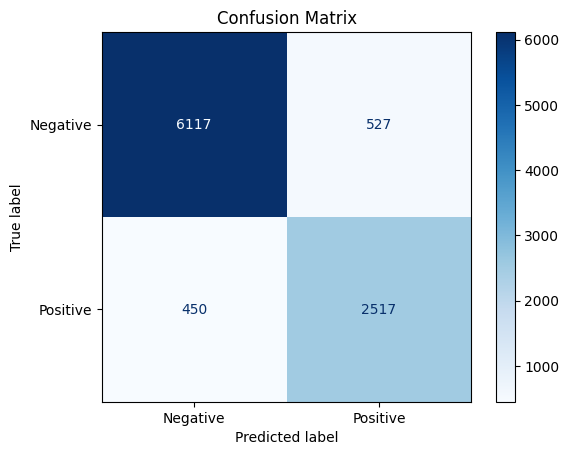

In [ ]:
y_pred = lstm_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score, recall_score, precision_score
print("Classification Report:")
print(classification_report(y_test, y_pred_binary, target_names=['Negative', 'Positive']))

# Calculate F1 score, recall, and precision
f1 = f1_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)

print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

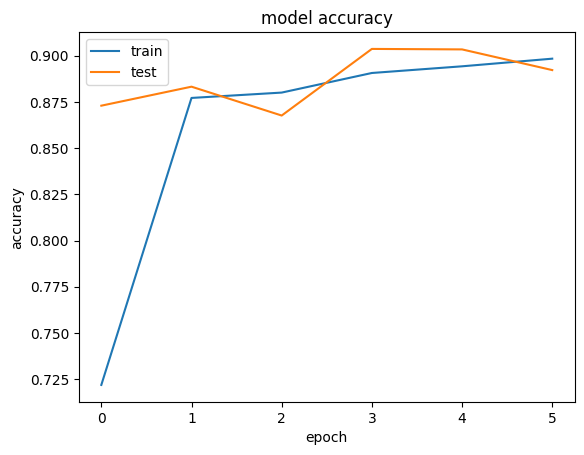

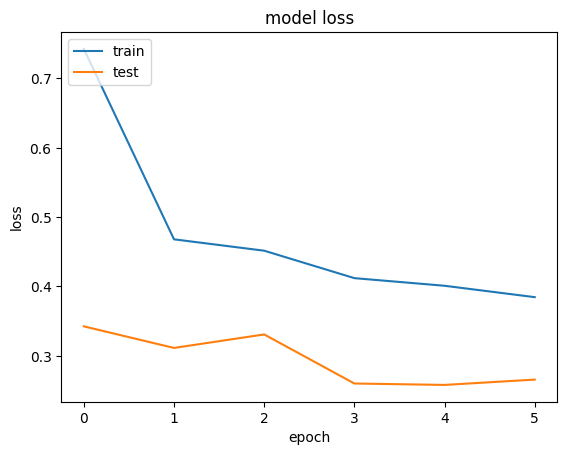

In [ ]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(lstm_model_history.history['accuracy'])
plt.plot(lstm_model_history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()